### Importing Important Libraries 
1. Pandas
2. Numpy
3. SciKit Learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import libraries for machine learning algorithms for Regression task
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [22]:
df=pd.read_csv('./data/stud.csv')

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing our Feature and Target Column

#### Feature Column

In [24]:
X=df.drop(columns=['writing_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


### Target Column

In [25]:
y=df['writing_score']

### Column Transformer

In [26]:
#Extract numerical features excluding columns with object datatypes
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
scaler=StandardScaler()
Encoder=OneHotEncoder()
preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",Encoder,categorical_features),
    ("StandardScaler",scaler,numerical_features)
]
    )

In [27]:
#Transforming the Column
X=preprocessor.fit_transform(X)

In [28]:
#Separate our Dataset into Test and Split
SEED=40
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=SEED)
X_train.shape,X_test.shape


((700, 19), (300, 19))

#### Evaluation function to know how well our model performed

In [29]:
def model_evaluation(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [30]:
#A dictionary containing all possible models to be used
models={"Linear Regression":LinearRegression(),
        "Lasso":Lasso(),
        "Random Forest Regressor":RandomForestRegressor(),
        "Ridge":Ridge(),
        "K-Neighbors Regressor":KNeighborsRegressor(),
        "Decision Tree":DecisionTreeRegressor(),
        "XGB Regressor" :XGBRegressor(),
        "CatBoosting Regressor":CatBoostRegressor(verbose=False),
        "AdaBoost Regressor":AdaBoostRegressor()

}

In [31]:
y_train.shape

(700,)

In [53]:

model_list=[]
r2_list=[]
#Iterate throught the dictionary to pick each values of the dictionary such as LinearRegression(),Ridge
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #train the model
    
    #Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate the model with the help of our function above
    train_mae,train_mse,train_rmse,train_r2=model_evaluation(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2=model_evaluation(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Trai set')
    print("- Root Mean Squared Error: ".format(train_rmse))
    print("- Mean Absolute Error:".format(train_mae))
    print("- R2 Score:".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error:".format(test_rmse))
    print("- Mean Absolute Error:".format(test_mae))
    print("- R2 Score:".format(test_r2))
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.4119
- Mean Absolute Error: 2.7461
- R2 Score: 0.9489
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.6756
- Mean Absolute Error: 2.9777
- R2 Score: 0.9431


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.4878
- Mean Absolute Error: 3.5973
- R2 Score: 0.9116
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.8774
- Mean Absolute Error: 3.9325
- R2 Score: 0.8998


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.5697
- Mean Absolute Error: 1.2480
- R2 Score: 0.9892
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.2983
- Mean Absolute Error: 3.4684
- R2 Score: 0.9222


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.4059
- Mean Absolute Error: 2.7430
- R2 Score: 0.9491
---------------------

### Model Result

In [54]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model,R2 Score
3,Ridge,0.943789
0,Linear Regression,0.943082
7,CatBoosting Regressor,0.934162
6,XGB Regressor,0.922672
2,Random Forest Regressor,0.922162
8,AdaBoost Regressor,0.909864
1,Lasso,0.899776
4,K-Neighbors Regressor,0.884793
5,Decision Tree,0.859627


## Ridge Regression

In [60]:
ridge_model=Ridge(fit_intercept=True)
ridge_model=ridge_model.fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy is of the model is %.2f:" %score)

Accuracy is of the model is 94.38:


### Plot Y_test and Y_pred

Text(0, 0.5, 'Predicted')

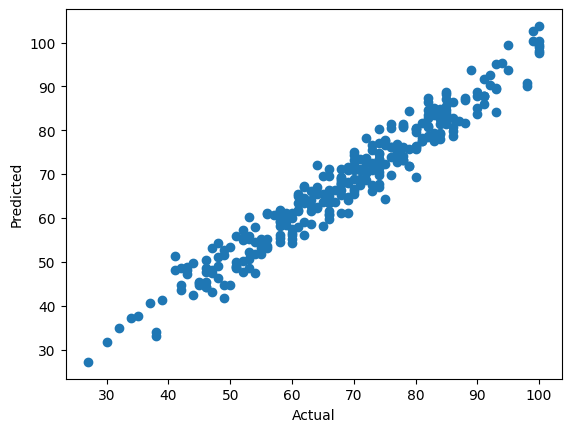

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')